In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
def calc_pca():
    #importing the data
    df_data = pd.read_csv('/content/drive/My Drive/Com-Olho-Datasets/Unstructured_Data/Research_Extract_With_Labels.csv')
    #Extracting all columns which are needed
    lst1 = ['time','time-domLoading','time-domContentLoadedEventStart','unload_ms','diff_time_dcle_end-start','diff_time_response_end-start','m_x','m_y','m_z','clock','globals-time','sort','TV_lof','TV_hbos']
    df_data_needed = df_data[df_data.columns.intersection(lst1)]
    #Splitting the data into outliers and inliers
    df_outliers = df_data_needed[df_data_needed["TV_hbos"]=="o"]
    df_outliers = df_outliers.reset_index()
    df_outliers = df_outliers.drop(['TV_lof','TV_hbos','index'],axis=1)
    df_inliers = df_data_needed[df_data_needed["TV_hbos"]=="n"]
    df_inliers = df_inliers.reset_index()
    df_inliers = df_inliers.drop(['TV_lof','TV_hbos','index'],axis=1)
    #converting outliers and inliers dataframes to a numpy array
    outlier_data = df_outliers.to_numpy()
    inlier_data = df_inliers.to_numpy()
    #Applying PCA on outlier and inlier arrays
    pca = PCA(2)
    projected_outliers = pca.fit_transform(outlier_data)
    projected_inliers = pca.fit_transform(inlier_data)
    #plotting scatter plot of reduced outliers and inliers
    plt.scatter(projected_outliers[:, 0], projected_outliers[:, 1],c="red",s=10)
    plt.scatter(projected_inliers[:, 0], projected_inliers[:, 1],c="blue",s=10)
    plt.xlabel('Reduced Component 1')
    plt.ylabel('Reduced Component 2')
    #saving the scatter plot
    plt.savefig("hbos_pca.png")
    #printing the scatter plot
    plt.show();

In [ ]:
#defining a function to calc histogram for HBOS or LOF
def plot_histo(df_interest_data,algotype):
    label_col = "TV_"+algotype
    lst1 = ['day_of_the_week','hour_of_the_day',label_col]
    df_interest_data_heat = df_interest_data[df_interest_data.columns.intersection(lst1)]
    df_interest_data_heat = df_interest_data_heat[df_interest_data_heat[label_col]=="o"]
    df_interest_data_heat = df_interest_data_heat.reset_index()
    df_interest_data_heat = df_interest_data_heat.drop(['index'],axis=1)
    df_interest_data_heat_grouped = df_interest_data_heat.groupby(['day_of_the_week','hour_of_the_day']).agg({label_col:'size'})
    df_interest_data_heat_grouped = df_interest_data_heat_grouped.reset_index()
    df_interest_data_heat_pivot = df_interest_data_heat_grouped.pivot("day_of_the_week","hour_of_the_day",label_col)
    heatt = sns.heatmap(df_interest_data_heat_pivot)
    heatt.figure.savefig("Heatmap_"+algotype+".png")

In [ ]:
def calc_dayvshreda():
    #loading the dataset
    df_labeled_data = pd.read_csv('/content/drive/My Drive/Com-Olho-Datasets/Unstructured_Data/Research_Extract_With_Labels.csv')
    df_labeled_data.head()
    #selecting the columns of interest
    lst = ['custom_req_date','custom_req_time','TV_lof','TV_hbos']
    df_interest_data = df_labeled_data[df_labeled_data.columns.intersection(lst)]
    #checking the number of nan's in the dataset
    print(df_interest_data['custom_req_date'].isna().sum())
    print(df_interest_data['custom_req_time'].isna().sum())
    print(df_interest_data['TV_lof'].isna().sum())
    print(df_interest_data['TV_hbos'].isna().sum())
    #removing those rows from the dataset and checking again
    df_interest_data = df_interest_data.dropna()
    print(df_interest_data['custom_req_date'].isna().sum())
    print(df_interest_data['custom_req_time'].isna().sum())
    print(df_interest_data['TV_lof'].isna().sum())
    print(df_interest_data['TV_hbos'].isna().sum())
    #making time and date columns in correct format
    cleaned_date = []
    cleaned_time = []
    for ind,row in df_interest_data.iterrows():
        #clean date
        lst = []
        lst_new = []
        date_str = str(row[0])
        lst = date_str.split(" ")
        lst_new = (lst[0].replace("-","/")).split("/")
        lst_new[2] = lst_new[2].replace("2019","19")
        cleaned_date.append(lst_new[0]+"/"+lst_new[1]+"/20"+lst_new[2])
        #clean time
        lst1 = []
        time_str = str(row[1])
        lst1 = time_str.split(":")
        cleaned_time.append(lst1[0]+":"+lst1[1])
    df_interest_data["date_cleaned"] = cleaned_date
    df_interest_data["time_cleaned"] = cleaned_time
    df_interest_data = df_interest_data.drop(['custom_req_date','custom_req_time'],axis=1)
    #Getting day of the week from date
    m = []
    week_days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    for ind,row in df_interest_data.iterrows():
        l = []
        l=row[2].split("/")
        day=datetime.date(int(l[2]),int(l[0]),int(l[1])).weekday()
        m.append(week_days[day])
    df_interest_data['day_of_the_week'] = m
    #Splitting time into hours and minutes
    hrs1 = []
    mins1 = []
    for ind,row in df_interest_data.iterrows():
        lst = []
        lst = row[3].split(":")
        hrs1.append(int(lst[0]))
        mins1.append(int(lst[1]))
    df_interest_data["hour_of_the_day"] = hrs1
    df_interest_data["min_of_the_hour"] = mins1
    plot_histo(df_interest_data,"lof")

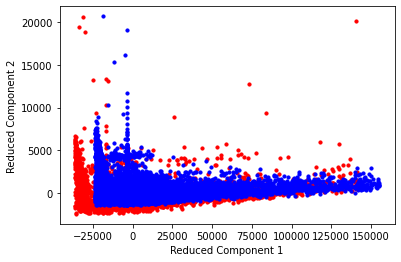

2
2
0
0
0
0
0
0


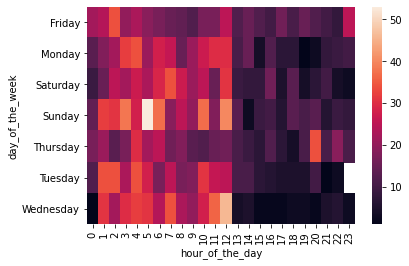

In [ ]:
#my main function
calc_pca()
calc_dayvshreda()